In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from random import randint as rd
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
target = pd.DataFrame(train['Price'], columns=['Price'])
train = train.drop(['Price', 'Id'], 1)
test = test.drop('Id', 1)

In [3]:
print(train.columns == test.columns)
target.tail()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


,Price
9995,196684.316040
9996,189050.289571
9997,159143.805370
9998,181595.339808
9999,218714.077615


In [4]:
train['marker'] = 'train'
test['marker'] = 'test'
dataset = pd.concat([train, test])
dataset.shape
dataset['marker']

0       train
1       train
2       train
3       train
4       train
        ...  
4995     test
4996     test
4997     test
4998     test
4999     test
Name: marker, Length: 15000, dtype: object

In [5]:
dataset.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
marker            object
dtype: object

In [6]:
dataset.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
marker              0
dtype: int64

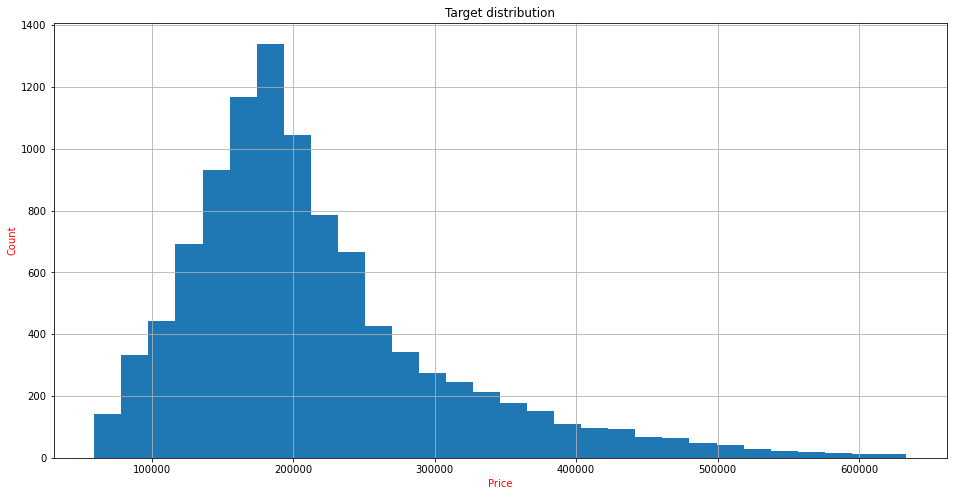

In [7]:
plt.figure(figsize = (16, 8))

target['Price'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('Price', c='red')

plt.title('Target distribution')
plt.show()

In [8]:
dataset.reset_index().drop('index', 1).tail(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
14990,94,2.0,47.776485,27.920873,6.0,8,9.0,1970,0.282798,B,B,33,8667,2,NaN,0,6,B,test
14991,64,2.0,45.493240,32.022565,6.0,4,9.0,1974,0.135650,B,B,46,7960,6,350.0,3,11,B,test
14992,96,3.0,80.182493,48.627326,10.0,10,17.0,2003,0.041116,B,B,53,14892,4,NaN,1,4,B,test
14993,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B,test
14994,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,B,B,25,5011,8,730.0,0,2,B,test
14995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,test
14996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,test
14997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,test
14998,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,test
14999,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,test


In [9]:
dataset.loc[dataset['Rooms'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
1397,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,train
1981,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,train
2269,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,train
3911,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,train
4366,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,train
4853,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,train
6149,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,train
8834,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,train
2406,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,test
2524,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,test


In [10]:
dataset['Rooms'].value_counts()

2.0     5910
1.0     5474
3.0     3334
4.0      240
5.0       25
0.0       10
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

In [11]:
dataset.loc[dataset['Rooms'].isin([17, 10, 19]), 'Rooms'] = dataset['Rooms'].median()

In [12]:
rooms_analys = pd.DataFrame(dataset.groupby('Rooms')['Square', 'LifeSquare', 'KitchenSquare'].agg(['min', 'max', 'mean']))
rooms_analys

<ipython-input-12-5644487a8438>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rooms_analys = pd.DataFrame(dataset.groupby('Rooms')['Square', 'LifeSquare', 'KitchenSquare'].agg(['min', 'max', 'mean']))


Square                         LifeSquare                          \
             min         max        mean        min          max       mean   
Rooms                                                                         
0.0     2.377248  212.932361   84.613222   0.873147   211.231125  87.043371   
1.0     1.136859  409.425181   41.200432   0.370619   410.639749  24.996356   
2.0     2.900586  641.065193   56.752119   0.567267   638.163193  36.054222   
3.0     4.390331  221.138768   77.001488   0.641822  7480.592129  53.353981   
4.0    37.920348  200.334539   96.923976   1.451846   201.627361  65.396877   
5.0    39.906082  275.645284  120.703670   0.333490   233.949309  81.456484   
6.0    59.414334  223.453689  131.206083  38.702244   104.113552  71.407898   

      KitchenSquare                    
                min     max      mean  
Rooms                                  
0.0             0.0    12.0  2.100000  
1.0             0.0  2014.0  6.132079  
2.0             0.0   620.0  5.814846  
3.0             0.0   123.0  6.715057  
4.0             0.0    32.0  8.291667  
5.0             0.0    42.0  9.600000  
6.0             0.0    16.0  7.333333

---
### <font color='grey'><b>I. Работа с данными:</b></font>

* квартиры с площадью менее 15м
* квартиры с аномально большой площадью комнат
* квартиры с количеством комнат = 0, 10, 17, 19
* квартиры с жилой аномальной жилой площадью > максимальной общей площади, а так же минимальной жилой площадью меньше 10м2.

Помним, что в жилой площади есть пропуски.
* квартиры с площадью кухни > максимальной площади квартиры, а так же те, у которых разность общей и жилой площади меньше площади кухни.
Так же поставим себе мнимальное значение площади кухни 5м2.

##### Давайте решим эти проблемы...
---

1. Площадь квартир менее 15м2 заменим на среднее значение площади квартир с таким же количеством комнат.
Для этого создадим датафрейм со столбцами "Количество комнат" и "средняя площадь среди аналогичных квартир",
а затем присвоим эти значения площадей квартирам менее 15м2 в основном датасете.

In [13]:
rooms_squares = pd.DataFrame({'Rooms': [i for i in dataset['Rooms'].unique()],
                             'Squares': [i for i in rooms_analys['Square']['mean']]}, columns=['Rooms', 'Squares'])

rooms_squares

,Rooms,Squares
0,2.0,84.613222
1,3.0,41.200432
2,1.0,56.752119
3,4.0,77.001488
4,0.0,96.923976
5,5.0,120.703670
6,6.0,131.206083


In [14]:
for i in rooms_squares['Rooms']:
    dataset.loc[(dataset['Square'] < 15) & (dataset['Rooms'] == i), 'Square'] = rooms_squares.loc[rooms_squares['Rooms'] == i, 'Squares'].iloc[0] + rd(-2, 2) + rd(-9999, 9999) / 10000

Проверим, остались ли еще квартиры с площадью менее 15м2:

In [15]:
dataset.loc[(dataset['Square'] < 15) | (dataset['Square'].isna())]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker


Все ок. 

Аналогично решим еще и 4 и 5 задачу этого пункта:
* квартиры с жилой аномальной жилой площадью > максимальной общей площади, а так же минимальной жилой площадью меньше 10м2
* квартиры с площадью кухни > максимальной площади квартиры, а так же те, у которых разность общей и жилой площади меньше площади кухни.
Так же поставим себе мнимальное значение площади кухни 5м2.

Сначала уберем пропуски данных:

In [16]:
dataset_2 = dataset
dataset_2.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
marker              0
dtype: int64

In [17]:
rooms_lf_sq = pd.DataFrame({'Rooms': [i for i in dataset['Rooms'].unique()],
                             'lf_squares': [i for i in rooms_analys['LifeSquare']['mean']]}, columns=['Rooms', 'lf_squares'])

rooms_lf_sq

,Rooms,lf_squares
0,2.0,87.043371
1,3.0,24.996356
2,1.0,36.054222
3,4.0,53.353981
4,0.0,65.396877
5,5.0,81.456484
6,6.0,71.407898


In [18]:
for i in rooms_lf_sq['Rooms']:
    dataset.loc[((dataset['LifeSquare'] < 10) | (dataset['LifeSquare'].isna())) 
                & (dataset['Rooms'] == i), 'LifeSquare'] = rooms_lf_sq.loc[rooms_lf_sq['Rooms'] == i, 'lf_squares'].iloc[0] + rd(-2, 2) + rd(-9999, 9999) / 10000
    
dataset.loc[(dataset['LifeSquare'] < 10) | (dataset['Square'] - dataset['LifeSquare'] < 5) | (dataset['LifeSquare'].isna())]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,train
7,74,2.0,80.312926,88.680071,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,train
8,1,2.0,64.511437,88.680071,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,train
14,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,train
21,27,2.0,64.711835,88.680071,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,27,1.0,38.916778,35.882622,0.0,11,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,test
4974,52,1.0,44.442218,44.634608,0.0,5,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,test
4982,23,1.0,39.610426,38.187571,1.0,6,18.0,2013,0.034656,B,B,0,168,0,NaN,0,0,B,test
4998,62,2.0,81.305222,88.680071,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,test


Остались проблемы: 
 * значения жилой площади больше общей
 * значения общая - жилая < 5

In [19]:
lf_sq_outliers = dataset[dataset['Square'] - dataset['LifeSquare'] < 5].index

while len(lf_sq_outliers) != 0:
    dataset.loc[lf_sq_outliers, 'Square'] = dataset.loc[lf_sq_outliers, 'Square'].apply(
        lambda x: x + rd(5, 10) + rd(1, 9999) / 10000
    )
    lf_sq_outliers = dataset[dataset['Square'] - dataset['LifeSquare'] < 5].index

dataset.loc[(dataset['LifeSquare'] < 10) | (dataset['Square'] - dataset['LifeSquare'] < 5) | (dataset['LifeSquare'].isna())]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker


Все ок!

In [20]:
dataset_2 = dataset
rooms_kt_sq = pd.DataFrame({'Rooms': [i for i in dataset['Rooms'].unique()],
                             'kt_squares': [i for i in rooms_analys['KitchenSquare']['mean']]}, columns=['Rooms', 'kt_squares'])

rooms_kt_sq

,Rooms,kt_squares
0,2.0,2.100000
1,3.0,6.132079
2,1.0,5.814846
3,4.0,6.715057
4,0.0,8.291667
5,5.0,9.600000
6,6.0,7.333333


Сначала хотел пойти по простому пути и просто посчитать площадь кухни с помощью известных данных, но предположил, что это может сломать модель.

Поэтому мы применим правило минимальной площади к тем квартирам, в которых площадь кухни равна 1.

Площадь 0 оставим, тк это квартиры без планировки или вообще без кухни.

In [21]:
for i in rooms_kt_sq['Rooms']:
    dataset.loc[((dataset['KitchenSquare'] == 1) & (dataset['Rooms'] == i), 'KitchenSquare')] = rooms_kt_sq.loc[rooms_kt_sq['Rooms'] == i, 'kt_squares'].iloc[0]

dataset.loc[dataset['KitchenSquare'] == 1]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker


In [22]:
rooms_analys = pd.DataFrame(dataset.groupby('Rooms')['Square', 'LifeSquare', 'KitchenSquare'].agg(['min', 'max', 'mean']))
rooms_analys

<ipython-input-22-5644487a8438>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rooms_analys = pd.DataFrame(dataset.groupby('Rooms')['Square', 'LifeSquare', 'KitchenSquare'].agg(['min', 'max', 'mean']))


Square                          LifeSquare                          \
             min          max        mean        min          max       mean   
Rooms                                                                          
0.0    38.697117   221.734261  102.330015  19.345131   211.231125  86.575555   
1.0    16.319015  7499.574827   47.407999  10.651455   410.639749  28.420597   
2.0    28.517666   651.176793   67.728274  10.523868   638.163193  48.862222   
3.0    26.015442  7487.234517   83.165342  10.692499  7480.592129  48.685671   
4.0    37.920348   207.866439  100.362760  18.212628   201.627361  65.504093   
5.0    49.764382   283.047184  126.787082  39.394024   233.949309  87.861005   
6.0    65.212534   223.453689  133.138816  38.702244   104.113552  72.258698   

      KitchenSquare                     
                min     max       mean  
Rooms                                   
0.0             0.0    12.0   2.100000  
1.0             0.0  2014.0   7.478723  
2.0             0.0   620.0   6.078221  
3.0             0.0   123.0   7.752556  
4.0             0.0    32.0   8.910798  
5.0             0.0    42.0  10.976000  
6.0             0.0    16.0   7.333333

In [23]:
dataset.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare          0
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
marker              0
dtype: int64

С площадями и комнатностью все в порядке.

---

In [24]:
dataset.loc[(dataset['Floor'] > dataset['HouseFloor']) | (dataset['HouseFloor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
7,74,2.0,100.869826,88.680071,0.000000,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,train
14,27,1.0,61.065697,52.408027,5.814846,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,train
16,27,2.0,49.360648,31.993964,5.000000,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,train
21,27,2.0,97.523635,88.680071,2.100000,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,train
23,54,3.0,118.907612,24.317656,0.000000,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,95,1.0,45.542940,35.882622,0.000000,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,test
4989,39,2.0,44.203592,30.191691,6.000000,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B,test
4993,113,2.0,46.627882,27.058739,5.000000,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B,test
4997,12,3.0,109.749978,48.282625,9.000000,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B,test


Решим проблему с этажами. Есть квартиры в кторых этажность не совпадает с этажностью дома


In [25]:
floor_outliers = dataset[dataset['Floor'] > dataset['HouseFloor']].index

dataset.loc[floor_outliers, 'Floor'] = dataset.loc[floor_outliers, 'HouseFloor'].apply(
    lambda x: rd(0, x)
)

dataset.loc[(dataset['Floor'] > dataset['HouseFloor']) | (dataset['HouseFloor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
7,74,2.0,100.869826,88.680071,0.0,0,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,train
23,54,3.0,118.907612,24.317656,0.0,0,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,train
26,27,3.0,106.958871,24.317656,0.0,0,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,train
39,23,2.0,97.403148,88.680071,0.0,0,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,train
44,38,3.0,114.968196,106.340403,0.0,0,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4856,27,2.0,98.618640,88.680071,0.0,0,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,test
4887,88,3.0,89.549559,24.317656,0.0,0,0.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,test
4892,58,1.0,66.257978,35.882622,0.0,0,0.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,test
4976,95,1.0,45.542940,35.882622,0.0,0,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,test


In [26]:
floors_district = pd.DataFrame(dataset.groupby('DistrictId')['HouseFloor'].agg(['min', 'max', 'median']))
floors_district

,min,max,median
DistrictId,,,
0,5.0,22.0,12.0
1,0.0,27.0,17.0
2,0.0,25.0,9.0
3,1.0,22.0,12.0
4,2.0,18.0,9.0
...,...,...,...
208,5.0,9.0,7.0
209,5.0,9.0,5.0
210,10.0,10.0,10.0


Для завершения нормализации этажности мы создали датафрейм с серединным значением этажности дома по району.

применим эти данные к нашему датасету:

In [27]:
for i in floors_district.index:
    dataset.loc[(dataset['HouseFloor'] == 0) & (dataset['DistrictId'] == i), 'HouseFloor'] = floors_district.loc[floors_district.index == i, 'median'].iloc[0]

dataset = dataset.astype({'HouseFloor': int})

dataset.loc[(dataset['Floor'] > dataset['HouseFloor']) | (dataset['HouseFloor'] == 0) | (dataset['Floor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
7,74,2.0,100.869826,88.680071,0.000000,0,17,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,train
21,27,2.0,97.523635,88.680071,2.100000,0,1,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,train
23,54,3.0,118.907612,24.317656,0.000000,0,7,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,train
26,27,3.0,106.958871,24.317656,0.000000,0,12,2018,0.072158,B,B,2,629,1,NaN,0,0,A,train
39,23,2.0,97.403148,88.680071,0.000000,0,17,1977,0.034656,B,B,0,168,0,NaN,0,0,B,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958,58,3.0,94.876277,24.317656,0.000000,0,3,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,test
4971,93,1.0,38.648108,20.624272,8.000000,0,14,1986,0.521867,B,B,25,6149,0,NaN,0,0,B,test
4972,30,1.0,47.473134,37.003311,5.814846,0,1,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,test
4976,95,1.0,45.542940,35.882622,0.000000,0,5,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,test


In [28]:
floor_outliers = dataset[dataset['Floor'] == 0].index

dataset.loc[floor_outliers, 'Floor'] = dataset.loc[floor_outliers, 'HouseFloor'].apply(
    lambda x: rd(1, x)
)

dataset.loc[(dataset['Floor'] > dataset['HouseFloor']) | (dataset['HouseFloor'] == 0) | (dataset['Floor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker


---

Теперь все отлично. По программе "минимум" нам осталось избавиться от пропусков в Healthcare_1 и конвертировать все категориальные признаки в непрерывные значения.

---

In [29]:
dataset['Healthcare_1'] = dataset['Healthcare_1'].fillna(dataset['Healthcare_1'].median())
dataset.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
marker           0
dtype: int64

In [30]:
dataset.tail()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,marker
4995,11,3.0,67.133911,50.809797,6.0,5,9,1973,0.000170,B,B,36,5992,0,900.0,1,1,B,test
4996,1,1.0,40.198472,21.807061,10.0,12,17,2017,0.007122,B,B,1,264,0,900.0,0,1,B,test
4997,12,3.0,109.749978,48.282625,9.0,9,22,1989,0.090799,B,B,74,19083,2,900.0,5,15,B,test
4998,62,2.0,100.963722,88.680071,0.0,6,10,1977,0.072158,B,B,2,629,1,900.0,0,0,A,test
4999,30,2.0,100.379893,88.680071,2.1,10,17,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,test


In [31]:
dataset = pd.get_dummies(dataset)
dataset.tail()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,marker_test,marker_train
4995,11,3.0,67.133911,50.809797,6.0,5,9,1973,0.000170,36,...,1,1,0,1,0,1,0,1,1,0
4996,1,1.0,40.198472,21.807061,10.0,12,17,2017,0.007122,1,...,0,1,0,1,0,1,0,1,1,0
4997,12,3.0,109.749978,48.282625,9.0,9,22,1989,0.090799,74,...,5,15,0,1,0,1,0,1,1,0
4998,62,2.0,100.963722,88.680071,0.0,6,10,1977,0.072158,2,...,0,0,0,1,0,1,1,0,1,0
4999,30,2.0,100.379893,88.680071,2.1,10,17,1977,0.000078,22,...,3,23,0,1,0,1,0,1,1,0


С основными проблемами покончено. Дополнительно посмотрим еще несколько столбцов и приведем их в порядок.

In [32]:
dataset.loc[(dataset['HouseYear'] > 2020) | (dataset['HouseYear'] < 1900)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,marker_test,marker_train
1497,109,1.0,45.444870,20.239714,9.0,9,12,20052011,0.136330,30,...,3,6,0,1,0,1,0,1,0,1
4189,147,2.0,44.791836,28.360393,5.0,9,9,4968,0.319809,25,...,5,8,0,1,0,1,0,1,0,1


Предположим, что в первом случае указан период стройки дома, возьмем 2011,
во втором случае похоже, что это опечатка и год постройки 1968, а не 4968:

In [33]:
dataset.loc[dataset['HouseYear'] == 20052011, 'HouseYear'] = 2011
dataset.loc[dataset['HouseYear'] == 4968, 'HouseYear'] = 1968
dataset.loc[(dataset['HouseYear'] > 2020) | (dataset['HouseYear'] < 1900)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,marker_test,marker_train


In [34]:
dataset.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'marker_test', 'marker_train'],
      dtype='object')

In [35]:
dataset.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor         int32
HouseYear          int64
Ecology_1        float64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Ecology_2_A        uint8
Ecology_2_B        uint8
Ecology_3_A        uint8
Ecology_3_B        uint8
Shops_2_A          uint8
Shops_2_B          uint8
marker_test        uint8
marker_train       uint8
dtype: object

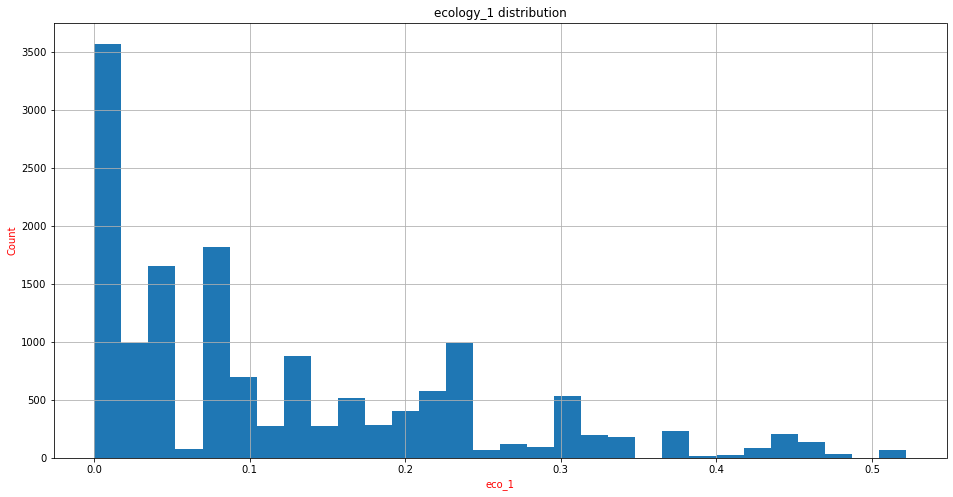

In [36]:
plt.figure(figsize = (16, 8))

dataset['Ecology_1'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('eco_1', c='red')

plt.title('ecology_1 distribution')
plt.show()

Явных выбросов не видно.

In [37]:
dataset.loc[dataset['Ecology_1'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,marker_test,marker_train
11,31,3.0,68.808859,45.736906,7.0,1,8,1959,0.0,23,...,0,4,0,1,0,1,0,1,0,1
35,200,3.0,85.280389,58.447967,9.0,2,5,1960,0.0,33,...,2,5,0,1,0,1,0,1,0,1
38,177,3.0,120.820236,48.991133,12.0,9,25,2012,0.0,36,...,0,2,0,1,0,1,0,1,0,1
80,108,2.0,49.888740,31.603650,6.0,9,12,1974,0.0,23,...,0,4,0,1,0,1,0,1,0,1
83,18,2.0,69.158553,33.040115,10.0,10,11,2000,0.0,30,...,0,5,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,17,1.0,42.966641,19.444965,9.0,2,8,1960,0.0,25,...,1,1,0,1,0,1,0,1,1,0
4871,128,2.0,78.233033,27.229154,6.0,7,9,1972,0.0,27,...,2,8,0,1,0,1,0,1,1,0
4876,145,2.0,69.405644,30.100027,8.0,2,17,1988,0.0,30,...,0,5,0,1,0,1,1,0,1,0
4923,18,3.0,92.954969,41.882735,7.0,9,14,1987,0.0,30,...,0,5,0,1,0,1,1,0,1,0


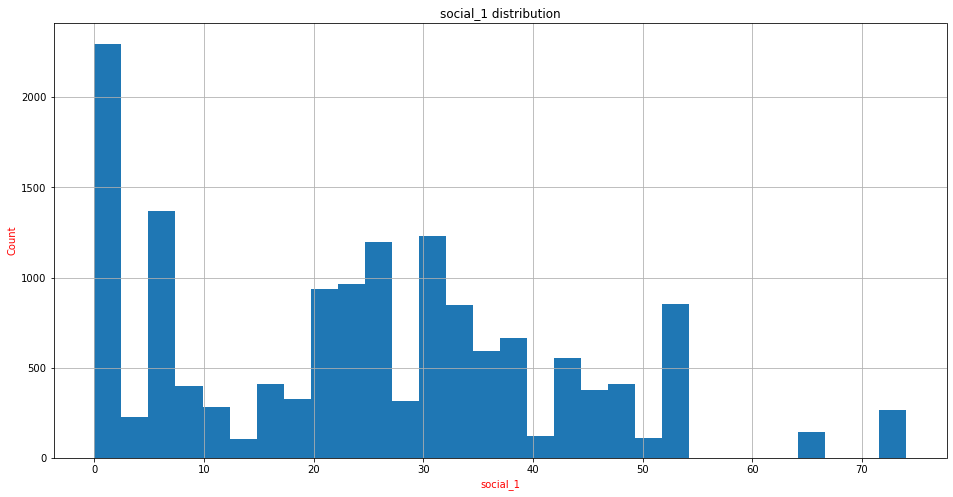

In [38]:
plt.figure(figsize = (16, 8))

dataset['Social_1'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('social_1', c='red')

plt.title('social_1 distribution')
plt.show()

Есть значения за пределами сновной группы, но они не единичны. Вывод - это не выброс.

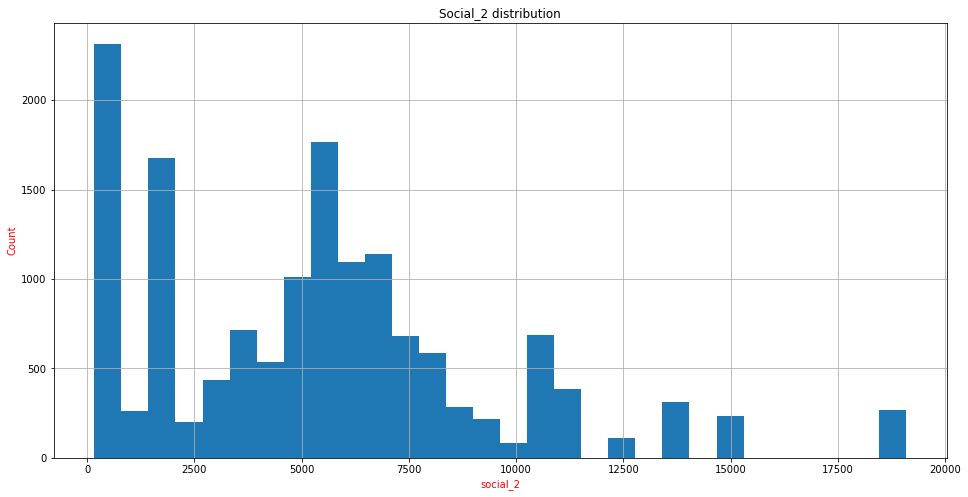

In [39]:
plt.figure(figsize = (16, 8))

dataset['Social_2'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('social_2', c='red')

plt.title('Social_2 distribution')
plt.show()

In [40]:
dataset.loc[dataset['Social_2'] > 17500, 'Social_2'].value_counts().iloc[0]

265

265 значений вне основной выборки. я бы не назвал выбросом.

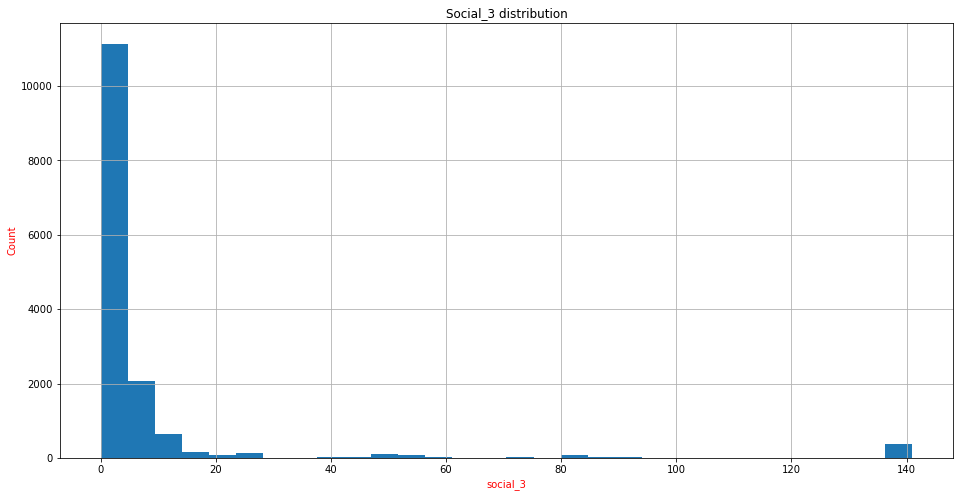

In [41]:
plt.figure(figsize = (16, 8))

dataset['Social_3'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('social_3', c='red')

plt.title('Social_3 distribution')
plt.show()

In [42]:
stat_1 = pd.DataFrame({'> 30': dataset.loc[dataset['Social_3'] > 30, 'Social_3'].shape,
                      ' == 0': dataset.loc[dataset['Social_3'] == 0, 'Social_3'].shape,
                      '0 < x < 30': dataset.loc[(dataset['Social_3'] > 0) & (dataset['Social_3'] < 30), 'Social_3'].shape,
                      'mean': dataset['Social_3'].mean()},
                     columns=['> 30', ' == 0', '0 < x < 30', 'mean'])
stat_1

,> 30,== 0,0 < x < 30,mean
0,782,4467,9751,8.113667


Очень похоже, что это выброс. Основная масса значений на промежутке [0, 30]. Попробуем Нулевые значения и максимальные приравнять к среднему.

In [43]:
dataset.loc[(dataset['Social_3'] > 30) | (dataset['Social_3'] == 0), 'Social_3'] = dataset['Social_3'].mean()

In [44]:
stat_1 = pd.DataFrame({'> 30': dataset.loc[dataset['Social_3'] > 30, 'Social_3'].shape,
                      ' == 0': dataset.loc[dataset['Social_3'] == 0, 'Social_3'].shape,
                      '0 < x < 30': dataset.loc[(dataset['Social_3'] > 0) & (dataset['Social_3'] < 30), 'Social_3'].shape,
                      'mean': dataset['Social_3'].mean()},
                     columns=['> 30', ' == 0', '0 < x < 30', 'mean'])
stat_1

,> 30,== 0,0 < x < 30,mean
0,0,0,15000,5.731642


Немного уронили среднее значение. Но не так сильно как модой или медианой.

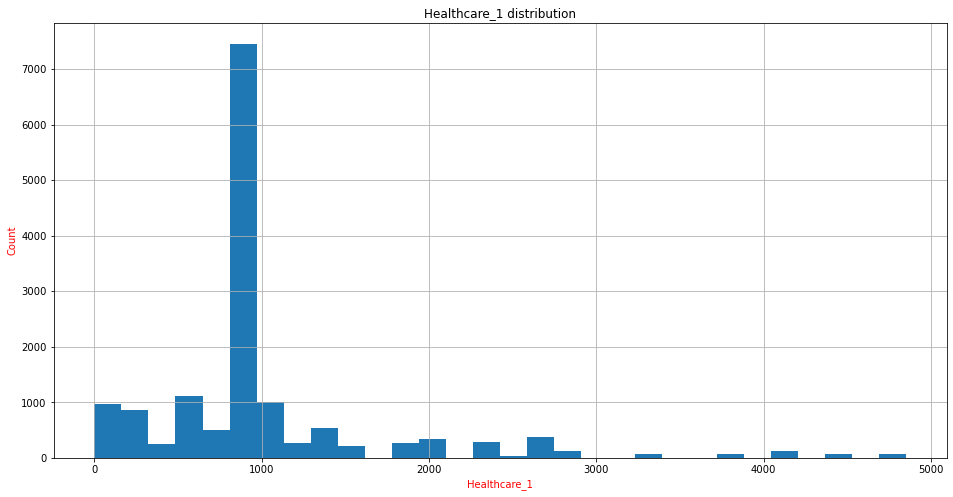

In [45]:
plt.figure(figsize = (16, 8))

dataset['Healthcare_1'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('Healthcare_1', c='red')

plt.title('Healthcare_1 distribution')
plt.show()

Тут все спорно. Значения > 3000 похожи на выбросы, пока оставим как есть.

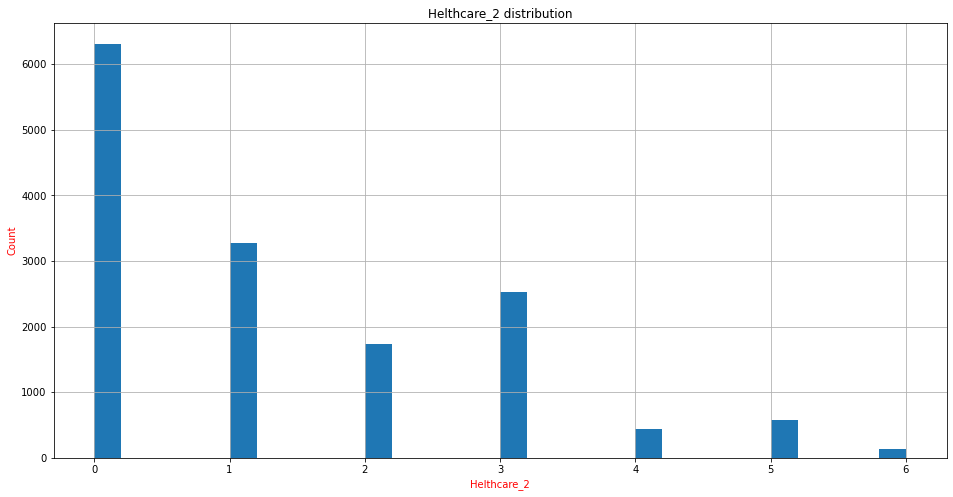

In [46]:
plt.figure(figsize = (16, 8))

dataset['Helthcare_2'].hist(bins=30)
plt.ylabel('Count', c='red')
plt.xlabel('Helthcare_2', c='red')

plt.title('Helthcare_2 distribution')
plt.show()

Приступим к обратному разделению на test и  train, а затем обучим модель.

---

### <font color='grey'><b>II. Обучение и предсказание:</b></font>

In [47]:
dataset['DistrictId'] = dataset['DistrictId'].astype(str)
test = dataset.loc[dataset['marker_test'] == 1]
train = dataset.loc[dataset['marker_train'] == 1]
test = test.drop(['marker_test', 'marker_train'], 1)
train = train.drop(['marker_test', 'marker_train'], 1)
test.reset_index()
train.reset_index()

test.shape, train.shape

((5000, 21), (10000, 21))

Попробуем создать новый признак, зависящий от цены.

In [48]:
gp = train.groupby(['Rooms'])['Square'].mean()
train['mean_square_by_rooms'] = train['Rooms'].map(gp.to_dict())

gp_2 = test.groupby(['Rooms'])['Square'].mean()
test['mean_square_by_rooms'] = test['Rooms'].map(gp_2.to_dict())

train['diff_square_and_mean_square_by_rooms'] = train['Square'] - train['mean_square_by_rooms']
train['ratio_square_and_mean_square_by_rooms'] = train['Square'] / train['mean_square_by_rooms'] - 1
test['diff_square_and_mean_square_by_rooms'] = test['Square'] - test['mean_square_by_rooms']
test['ratio_square_and_mean_square_by_rooms'] = test['Square'] / test['mean_square_by_rooms'] - 1

In [49]:
train.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'mean_square_by_rooms', 'diff_square_and_mean_square_by_rooms',
       'ratio_square_and_mean_square_by_rooms'],
      dtype='object')

In [50]:
# train = train.drop('Price', 1)
# train.columns

In [51]:
train = pd.concat([train, target], 1)

gp = train.groupby(['DistrictId'])['Price'].mean()
train['mean_dist_price'] = train['DistrictId'].map(gp.to_dict())
train = train.drop('Price', 1)

test['mean_dist_price'] = test['DistrictId'].map(gp.to_dict())


In [52]:
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7500, 25), (7500, 1), (2500, 25), (2500, 1))

In [139]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=8, max_features=5, random_state=42, n_jobs=4)
rf.fit(x_train, np.ravel(y_train))

RandomForestRegressor(max_depth=8, max_features=5, n_estimators=1000, n_jobs=4,
                      random_state=42)

In [140]:
rf_pred = rf.predict(x_train)
rf_real_pred = rf.predict(x_test)

print(f'R_2 on train: {r2_score(y_train, rf_pred)}\nR_2 on test: {r2_score(y_test, rf_real_pred)}')

R_2 on train: 0.7859724052256737
R_2 on test: 0.7013979232948738


Text(400000, 100000, ' R^2 on TEST: 0.701')

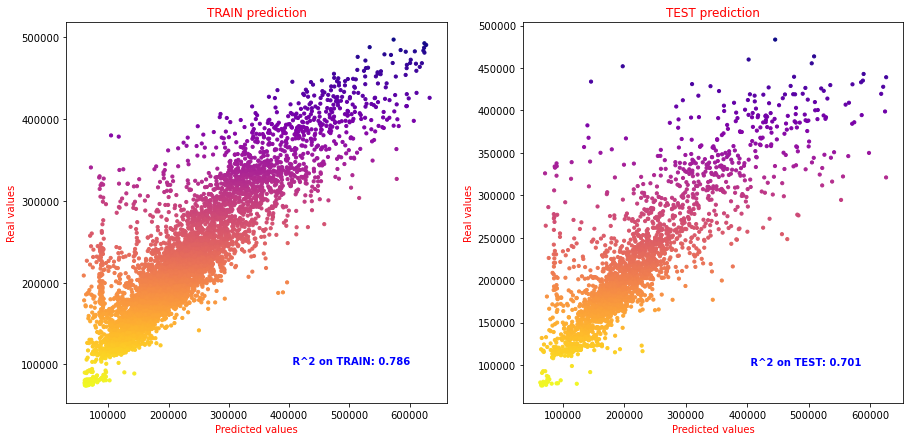

In [141]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.scatter(y_train, rf_pred, c=rf_pred, s=10, cmap='plasma_r')
plt.xlabel('Predicted values', c='red')
plt.ylabel('Real values', c='red')
plt.title('TRAIN prediction', c='red')
plt.text(400000, 100000, f' R^2 on TRAIN: {round(r2_score(y_train, rf_pred), 3)}', c='blue', fontweight='bold')

plt.subplot(122)
plt.scatter(y_test, rf_real_pred, c=rf_real_pred, s=10, cmap='plasma_r')
plt.xlabel('Predicted values', c='red')
plt.ylabel('Real values', c='red')
plt.title('TEST prediction', c='red')
plt.text(400000, 100000, f' R^2 on TEST: {round(r2_score(y_test, rf_real_pred), 3)}', c='blue', fontweight='bold')

In [146]:
# осталось 8 пустых значений. видимо, этих районов не было в трейне. заменим на средние значения этого столбца.
test.loc[test['mean_dist_price'].isna()] = test['mean_dist_price'].mean()

In [147]:
rf_final_pred = rf.predict(test)
rf_final_pred = pd.DataFrame(rf_final_pred, columns=['Price'])
rf_final_pred.reset_index()
rf_final_pred.to_csv('Dmitrenko_predictions.csv')

Text(0.5, 1.0, 'Predicted Prices Distribution')

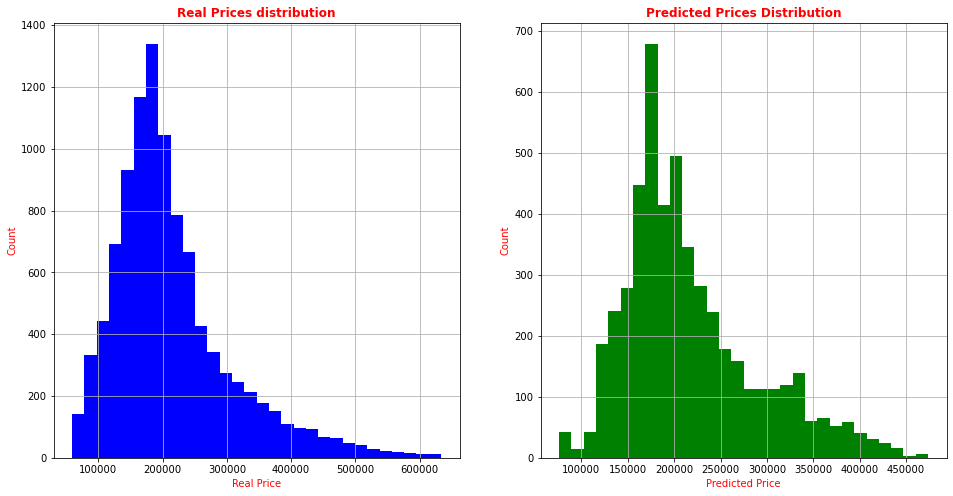

In [148]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
target['Price'].hist(bins=30, color='blue')
plt.ylabel('Count', c='red')
plt.xlabel('Real Price', c='red')
plt.title('Real Prices distribution', c='red', fontweight='bold')

plt.subplot(122)
rf_final_pred['Price'].hist(bins=30, color='green')
plt.xlabel('Predicted Price', c='red')
plt.ylabel('Count', c='red')
plt.title('Predicted Prices Distribution', c='red', fontweight='bold')

Не знаю, правильно ли это, но кажется, что цены распределились одинаково, что говорит о нашей модели с хорошей стороны. 
График соответствия ценовых значений нам говорит о том, что модель плохо работает на квартирах с ценой выше 300 000.
Исследуем наш датасет в этом диапазоне:

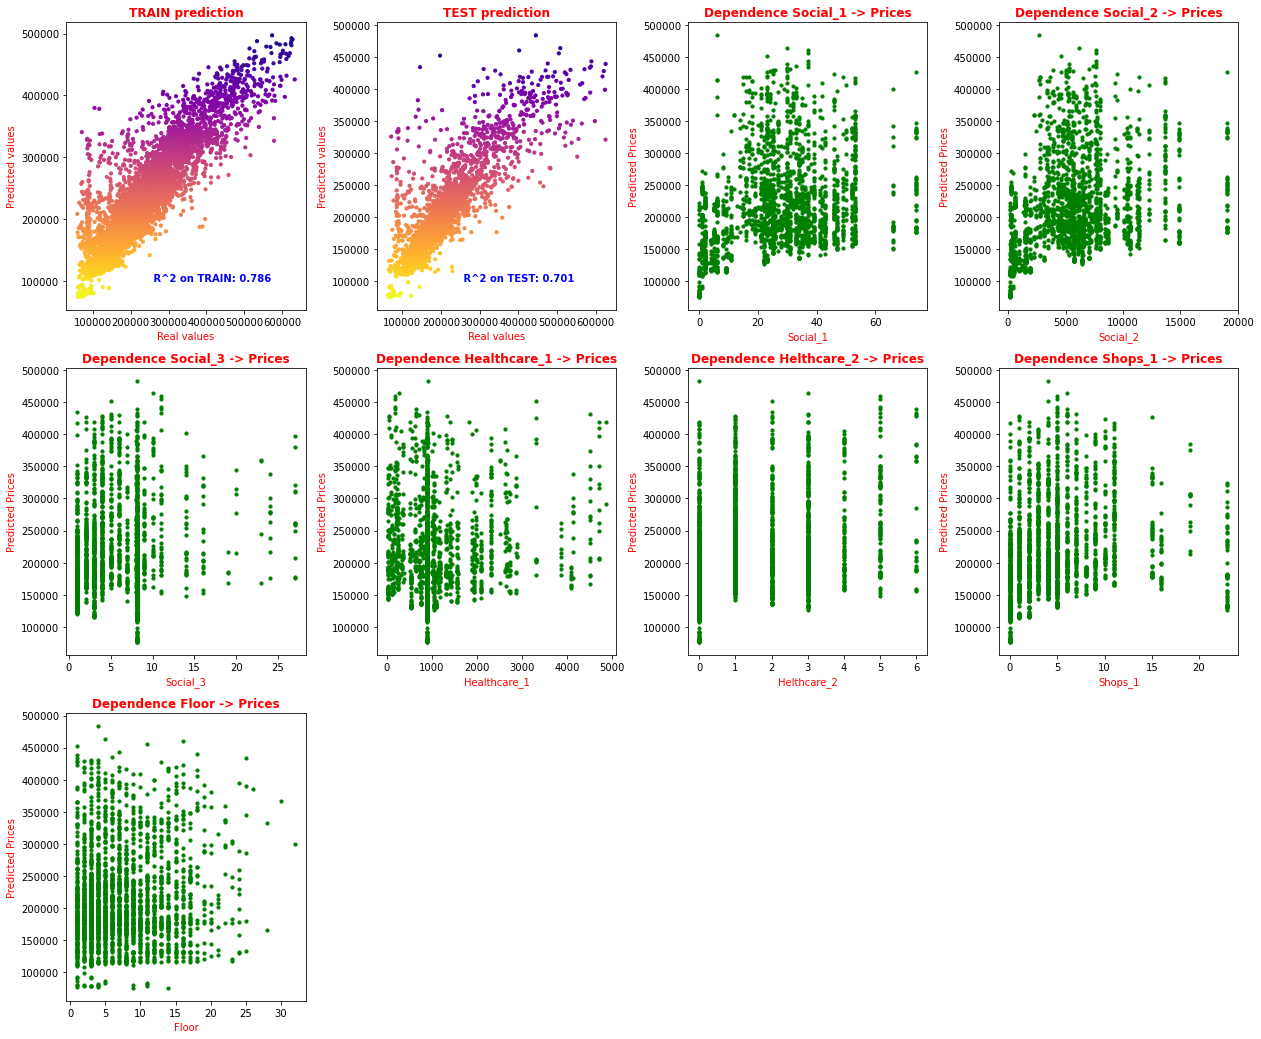

In [149]:
plt.figure(figsize=(21, 18))

plt.subplot(341)
plt.scatter(y_train, rf_pred, c=rf_pred, s=10, cmap='plasma_r')
plt.xlabel('Real values', c='red')
plt.ylabel('Predicted values', c='red')
plt.title('TRAIN prediction', c='red', fontweight='bold')
plt.text(250000, 100000, f' R^2 on TRAIN: {round(r2_score(y_train, rf_pred), 3)}', c='blue', fontweight='bold')

plt.subplot(342)
plt.scatter(y_test, rf_real_pred, c=rf_real_pred, s=10, cmap='plasma_r')
plt.xlabel('Real values', c='red')
plt.ylabel('Predicted values', c='red')
plt.title('TEST prediction', c='red', fontweight='bold')
plt.text(250000, 100000, f' R^2 on TEST: {round(r2_score(y_test, rf_real_pred), 3)}', c='blue', fontweight='bold')

plt.subplot(343)
plt.scatter(x_test['Social_1'], rf_real_pred, s=10, c='green')
plt.xlabel('Social_1', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Social_1 -> Prices', c='red', fontweight='bold')
# plt.ylim(300000, 600000)

plt.subplot(344)
plt.scatter(x_test['Social_2'], rf_real_pred, s=10, c='green')
plt.xlabel('Social_2', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Social_2 -> Prices', c='red', fontweight='bold')

plt.subplot(345)
plt.scatter(x_test['Social_3'], rf_real_pred, s=10, c='green')
plt.xlabel('Social_3', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Social_3 -> Prices', c='red', fontweight='bold')

plt.subplot(346)
plt.scatter(x_test['Healthcare_1'], rf_real_pred, s=10, c='green')
plt.xlabel('Healthcare_1', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Healthcare_1 -> Prices', c='red', fontweight='bold')

plt.subplot(347)
plt.scatter(x_test['Helthcare_2'], rf_real_pred, s=10, c='green')
plt.xlabel('Helthcare_2', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Helthcare_2 -> Prices', c='red', fontweight='bold')

plt.subplot(348)
plt.scatter(x_test['Shops_1'], rf_real_pred, s=10, c='green')
plt.xlabel('Shops_1', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Shops_1 -> Prices', c='red', fontweight='bold')

plt.subplot(349)
plt.scatter(x_test['Floor'], rf_real_pred, s=10, c='green')
plt.xlabel('Floor', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Floor -> Prices', c='red', fontweight='bold')

plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.savefig('Сводная_2.jpeg')

In [150]:
feature_importance = pd.DataFrame({'name': x_train.columns, 
                                   'feature_importance': rf.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.029434,DistrictId
1,0.130360,Rooms
2,0.132220,Square
3,0.057841,LifeSquare
4,0.045935,KitchenSquare
5,0.006206,Floor
6,0.012369,HouseFloor
7,0.019969,HouseYear
8,0.015348,Ecology_1
9,0.058071,Social_1


Вывод:
* Social_1 и Social_2 очень сконцетрированы на 0 среди дешевых квартир, что довольно логично. 
* Показатели healthcare тоже распределились довольно логично.

Среди вторичных признаков я не вижу проблем.

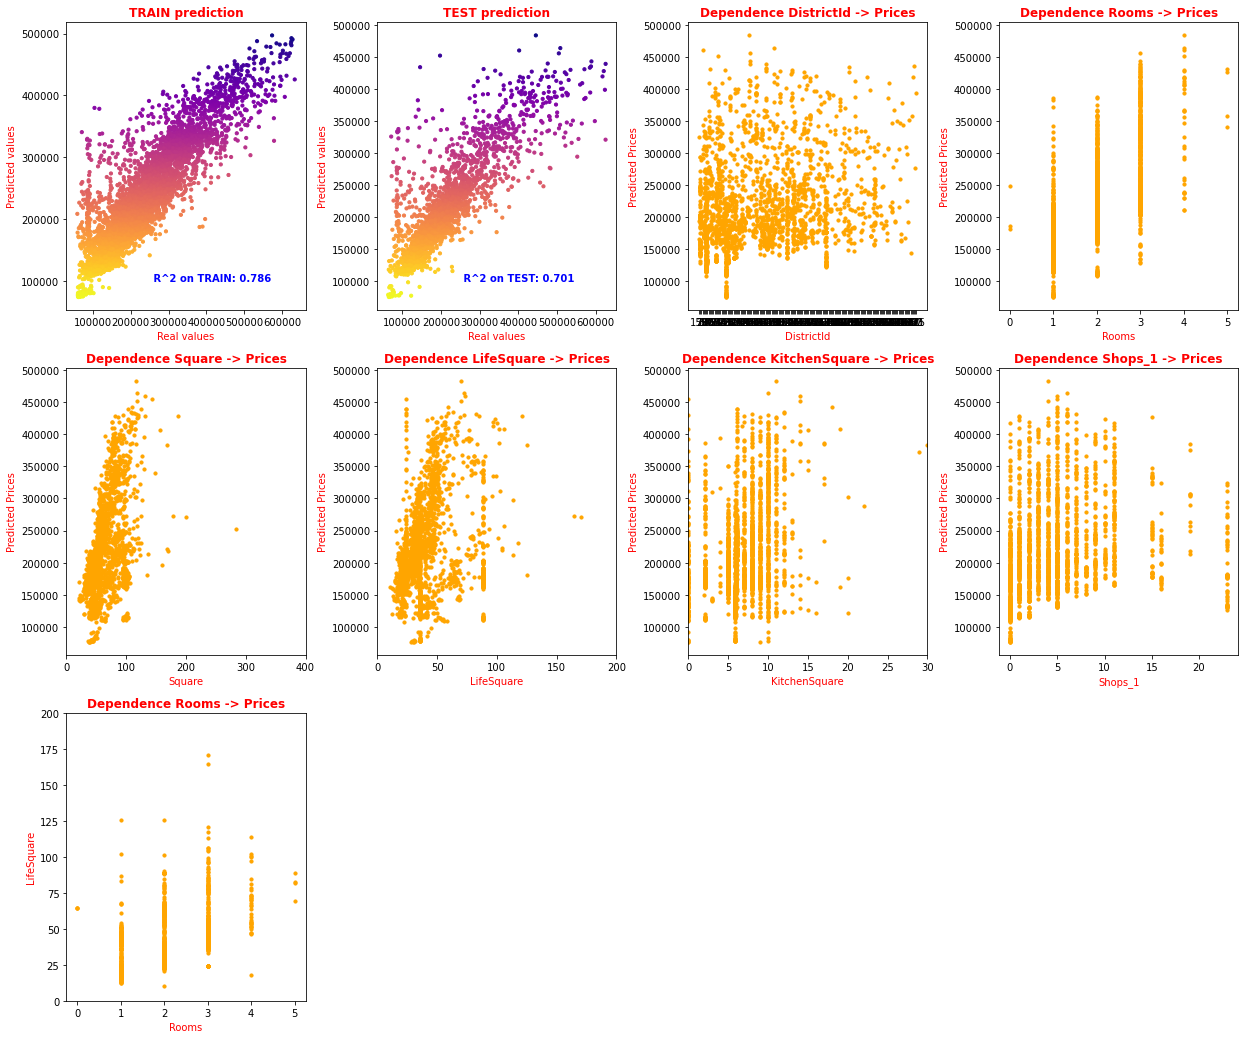

In [151]:
plt.figure(figsize=(21, 18))

plt.subplot(341)
plt.scatter(y_train, rf_pred, c=rf_pred, s=10, cmap='plasma_r')
plt.xlabel('Real values', c='red')
plt.ylabel('Predicted values', c='red')
plt.title('TRAIN prediction', c='red', fontweight='bold')
plt.text(250000, 100000, f' R^2 on TRAIN: {round(r2_score(y_train, rf_pred), 3)}', c='blue', fontweight='bold')

plt.subplot(342)
plt.scatter(y_test, rf_real_pred, c=rf_real_pred, s=10, cmap='plasma_r')
plt.xlabel('Real values', c='red')
plt.ylabel('Predicted values', c='red')
plt.title('TEST prediction', c='red', fontweight='bold')
plt.text(250000, 100000, f' R^2 on TEST: {round(r2_score(y_test, rf_real_pred), 3)}', c='blue', fontweight='bold')

plt.subplot(343)
plt.scatter(x_test['DistrictId'], rf_real_pred, s=10, c='orange')
plt.xlabel('DistrictId', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence DistrictId -> Prices', c='red', fontweight='bold')
# plt.ylim(300000, 600000)

plt.subplot(344)
plt.scatter(x_test['Rooms'], rf_real_pred, s=10, c='orange')
plt.xlabel('Rooms', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Rooms -> Prices', c='red', fontweight='bold')

plt.subplot(345)
plt.scatter(x_test['Square'], rf_real_pred, s=10, c='orange')
plt.xlabel('Square', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Square -> Prices', c='red', fontweight='bold')
plt.xlim(0, 400)

plt.subplot(346)
plt.scatter(x_test['LifeSquare'], rf_real_pred, s=10, c='orange')
plt.xlabel('LifeSquare', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence LifeSquare -> Prices', c='red', fontweight='bold')
plt.xlim(0, 200)

plt.subplot(347)
plt.scatter(x_test['KitchenSquare'], rf_real_pred, s=10, c='orange')
plt.xlabel('KitchenSquare', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence KitchenSquare -> Prices', c='red', fontweight='bold')
plt.xlim(0, 30)


plt.subplot(348)
plt.scatter(x_test['Shops_1'], rf_real_pred, s=10, c='orange')
plt.xlabel('Shops_1', c='red')
plt.ylabel('Predicted Prices', c='red')
plt.title('Dependence Shops_1 -> Prices', c='red', fontweight='bold')

plt.subplot(349)
plt.scatter(x_test['Rooms'], x_test['LifeSquare'], s=10, c='orange')
plt.xlabel('Rooms', c='red')
plt.ylabel('LifeSquare', c='red')
plt.title('Dependence Rooms -> Prices', c='red', fontweight='bold')
plt.ylim(0, 200)

plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.savefig('Сводная_2.jpeg')